## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-2
EPOCHS = 25
BATCH_SIZE = [8, 16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for bs in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=bs, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    exp_name_tag = "exp-B_S-%s" % str(bs)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0719 21:53:14.444752 45216 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 21:53:14.475668 45216 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 21:53:14.480656 45216 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0719 21:53:14.591362 45216 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0719 21:53:14.826732 45216 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 56s 1ms/step - loss: 1.4138 - acc: 0.4981 - val_loss: 1.4185 - val_acc: 0.4940
Epoch 15/25
50000/50000 [==============================] - 56s 1ms/step - loss: 1.4065 - acc: 0.4991 - val_loss: 1.4583 - val_acc: 0.4792
Epoch 16/25
50000/50000 [==============================] - 56s 1ms/step - loss: 1.4021 - acc: 0.5007 - val_loss: 1.4183 - val_acc: 0.4899
Epoch 17/25
50000/50000 [==============================] - 58s 1ms/step - loss: 1.3958 - acc: 0.5043 - val_loss: 1.4936 - val_acc: 0.4651
Epoch 18/25
50000/50000 [==============================] - 63s 1ms/step - loss: 1.3817 - acc: 0.5120 - val_loss: 1.4346 - val_acc: 0.4886
Epoch 19/25
50000/50000 [==============================] - 61s 1ms/step - loss: 1.3660 - acc: 0.5159 - val_loss: 1.4606 - val_acc: 0.4831
Epoch 20/25
50000/50000 [==============================] - 61s 1ms/step - loss: 1.3612 - acc: 0.5152 - val_loss: 1.4258 - val_acc: 0.4850
Epoch 21/25
50000/50000 [=====================

50000/50000 [==============================] - 14s 274us/step - loss: 1.4781 - acc: 0.4717 - val_loss: 1.5425 - val_acc: 0.4503
Epoch 3/25
50000/50000 [==============================] - 14s 279us/step - loss: 1.4058 - acc: 0.4999 - val_loss: 1.6595 - val_acc: 0.4162
Epoch 4/25
50000/50000 [==============================] - 14s 276us/step - loss: 1.3400 - acc: 0.5213 - val_loss: 1.5684 - val_acc: 0.4484
Epoch 5/25
50000/50000 [==============================] - 14s 285us/step - loss: 1.2869 - acc: 0.5419 - val_loss: 1.4751 - val_acc: 0.4740
Epoch 6/25
50000/50000 [==============================] - 14s 282us/step - loss: 1.2435 - acc: 0.5589 - val_loss: 1.6672 - val_acc: 0.4334
Epoch 7/25
50000/50000 [==============================] - 14s 278us/step - loss: 1.2044 - acc: 0.5695 - val_loss: 1.5345 - val_acc: 0.4577
Epoch 8/25
50000/50000 [==============================] - 14s 279us/step - loss: 1.1721 - acc: 0.5823 - val_loss: 1.5989 - val_acc: 0.4409
Epoch 9/25
50000/50000 [==============

50000/50000 [==============================] - 10s 199us/step - loss: 0.6016 - acc: 0.7847 - val_loss: 1.8651 - val_acc: 0.4771


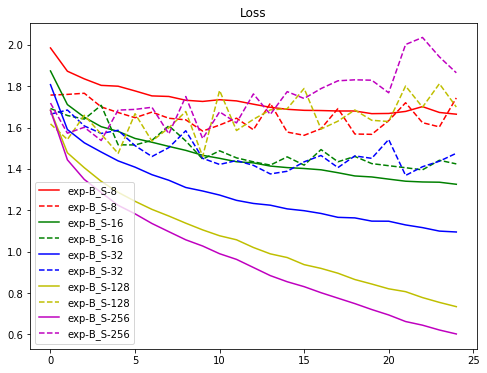

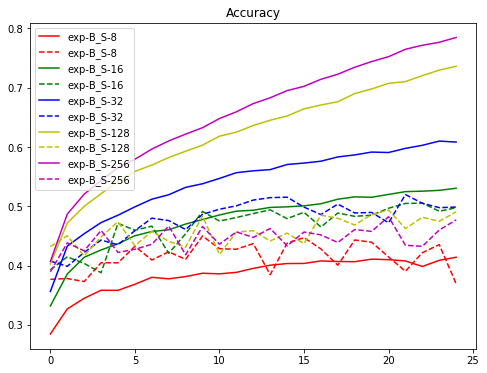

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()